<a href="https://colab.research.google.com/github/dioz-s/StudyGroup4/blob/main/AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/AUC.csv')

df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [48]:
def extract_stars(stars_str):
    try:

        rating = float(stars_str.split(' out')[0])
        return rating
    except:
        return None

if 'stars' in df.columns:

    df['stars'] = df['stars'].apply(extract_stars)
else:
    print("Kolom 'stars' tidak ditemukan!")

print(df[['name', 'stars']])

                                             name  stars
0                      Geronimo Stilton #11 & #12    5.0
1                                The Burning Maze    4.5
2                                    The Deep End    4.5
3                            Daughter of the Deep    4.5
4      The Lightning Thief: Percy Jackson, Book 1    4.5
...                                           ...    ...
87484                   Last Days of the Bus Club    NaN
87485                                    The Alps    NaN
87486                        The Innocents Abroad    NaN
87487                       A Sentimental Journey    NaN
87488                                      Havana    NaN

[87489 rows x 2 columns]


In [49]:
df.head(2)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5.0,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5,820.00


In [50]:
fix_cols = ['price', 'stars']

df[fix_cols] = df[fix_cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         87489 non-null  object 
 1   author       87489 non-null  object 
 2   narrator     87489 non-null  object 
 3   time         87489 non-null  object 
 4   releasedate  87489 non-null  object 
 5   language     87489 non-null  object 
 6   stars        15072 non-null  float64
 7   price        78015 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.3+ MB


In [51]:
df.isna().sum().sort_values(ascending=False)

,0
stars,72417
price,9474
name,0
author,0
narrator,0
time,0
releasedate,0
language,0


cek data duplikat

In [52]:
df.duplicated().sum()

38

In [53]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

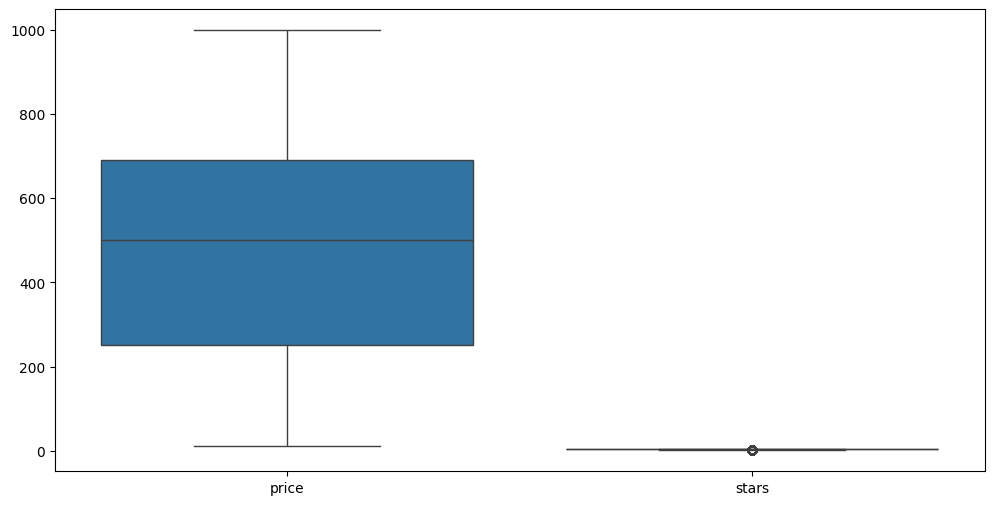

In [54]:
num_cols = ['price', 'stars']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

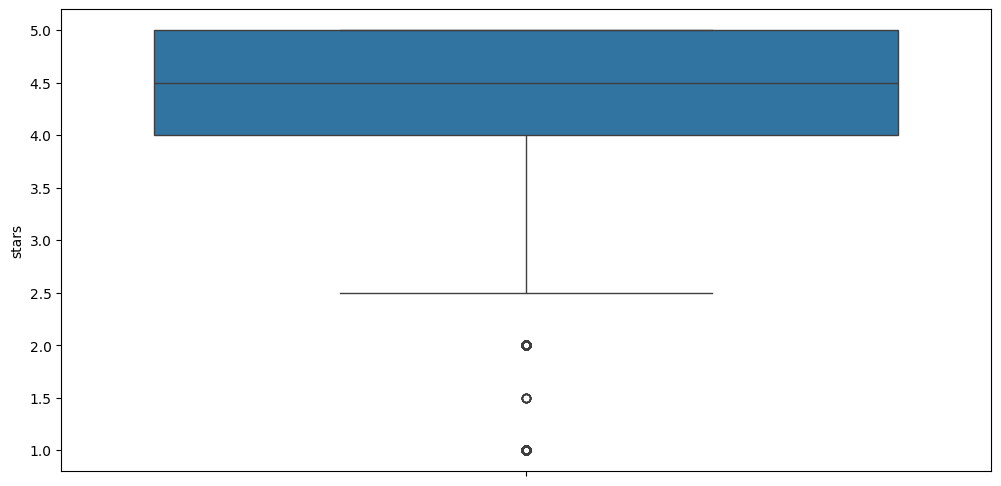

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['stars'])
plt.show()

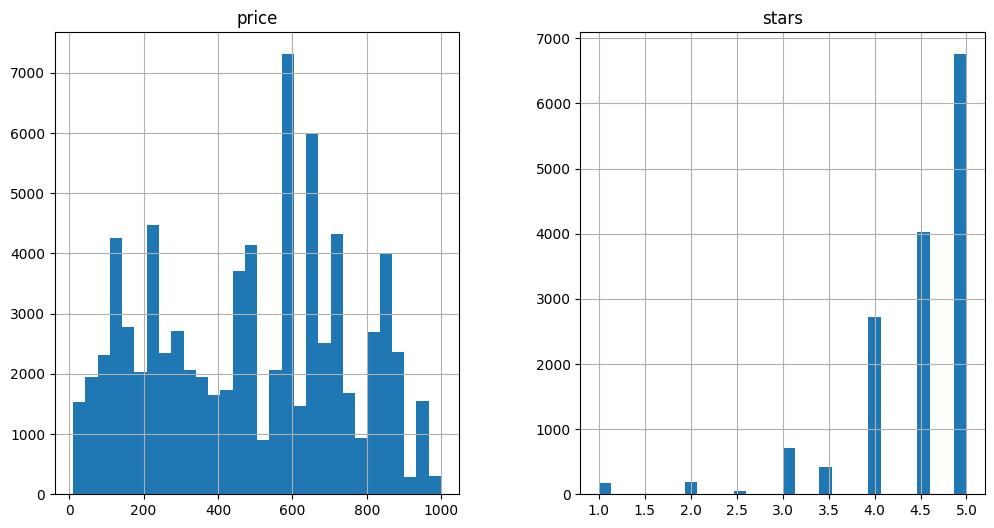

In [56]:

df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

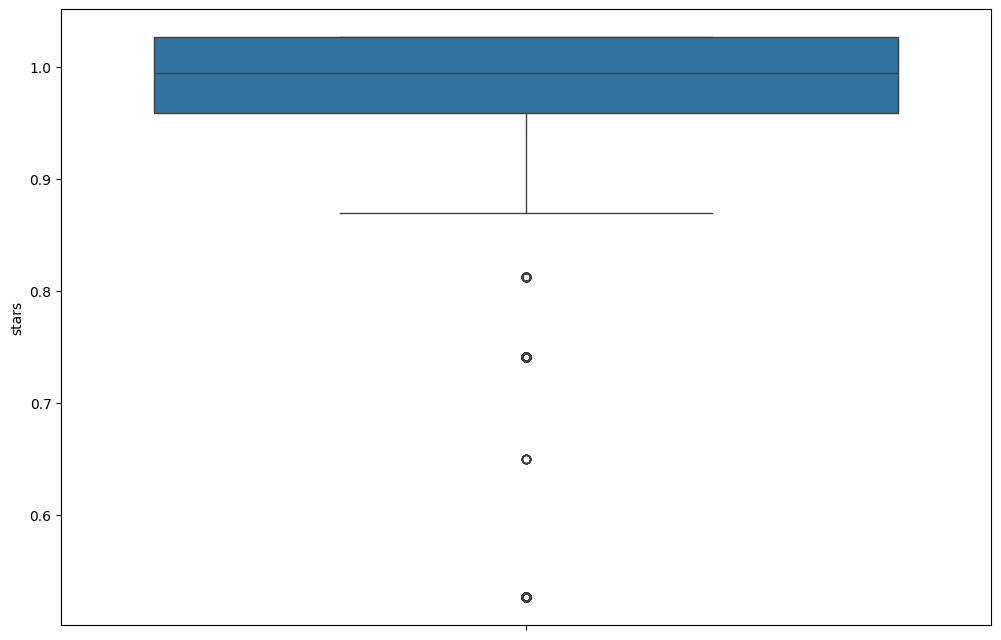

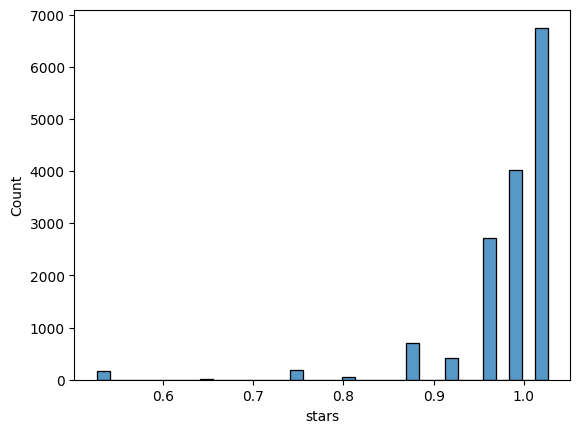

   price     stars
0  468.0  1.026672
1  820.0  0.995009
2  410.0  0.995009
3  615.0  0.995009
4  820.0  0.995009


In [58]:

df['stars'] = np.log1p(df['stars'])

# print(df[num_cols].head())
plt.figure(figsize=(12,8))
sns.boxplot(data=df['stars'])
plt.show()

sns.histplot(data=df['stars'], bins=35)
plt.show()
print(df[num_cols].head())

In [61]:
from sklearn.model_selection import train_test_split

x=df.drop('price', axis=1)
y=df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((69960, 7), (17491, 7), (69960,), (17491,))

In [62]:
x_train.head()


,name,author,narrator,time,releasedate,language,stars
77132,Blindsided,Writtenby:KateWatterson,Narratedby:TaraSands,8 hrs and 3 mins,15-07-19,English,NaN
21282,War Doctor,Writtenby:DavidNott,Narratedby:DavidNott,10 hrs and 55 mins,21-02-19,English,1.026672
49569,SmartPass Plus Audio Education Study Guide to ...,"Writtenby:WilliamShakespeare,MikeReeves","Narratedby:Full-CastfeaturingJoanWalker,PeterL...",9 hrs and 53 mins,14-06-06,English,NaN
8671,Soy una Nuez [I'm a Nut],Writtenby:BeatrizOsés,Narratedby:MarioRuiz,1 hr and 1 min,07-03-20,spanish,NaN
3524,Marco Polo,Writtenby:DavidAngus,"Narratedby:FrancesJeater,SamDastor,KerryShale",14 mins,02-12-13,English,NaN


In [64]:
print(x_train.columns)

Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars'],
      dtype='object')


In [67]:
x_train[fix_cols] = x_train[fix_cols].apply(pd.to_numeric, errors='coerce')


In [68]:
print(x_train[fix_cols].dtypes)

stars    float64
dtype: object


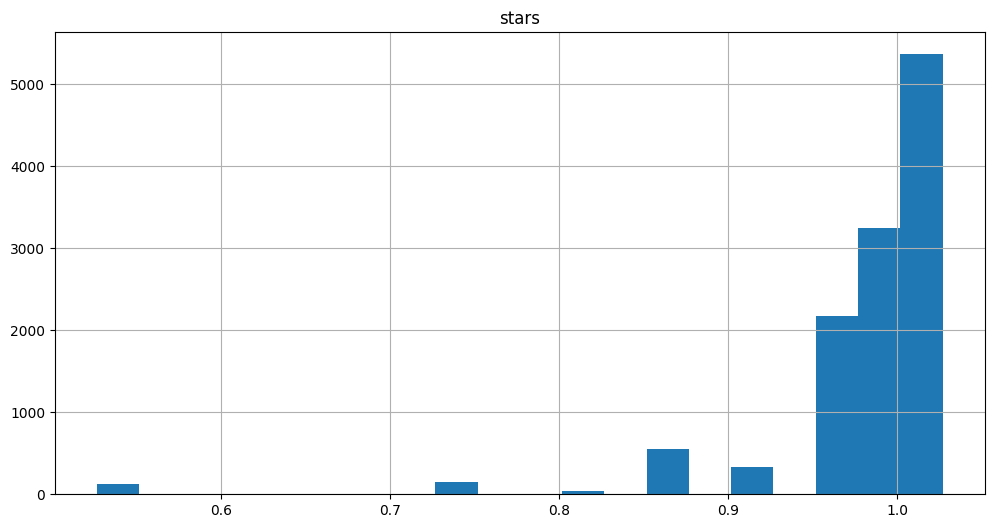

In [69]:
x_train[fix_cols].hist(bins=20, figsize=(12, 6))
plt.show()

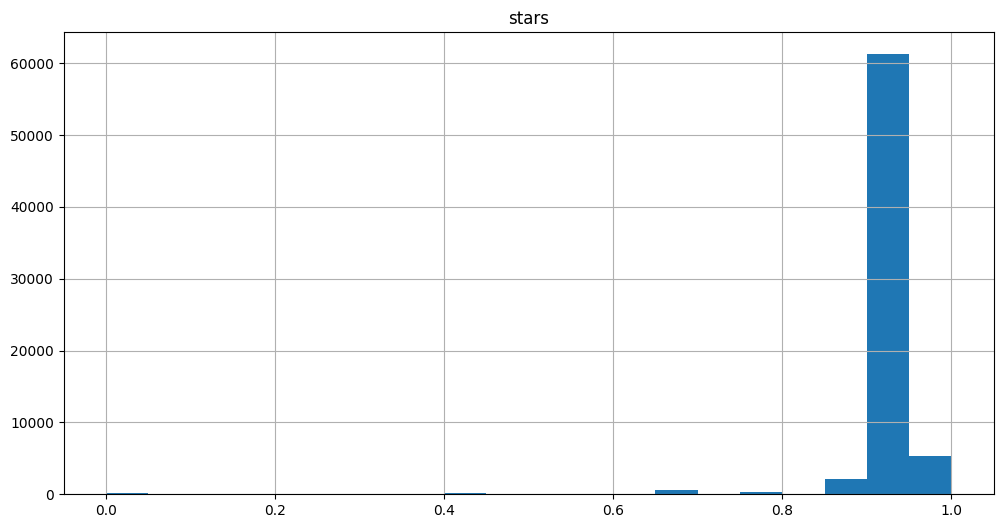

In [71]:
from sklearn.preprocessing import MinMaxScaler

x_train = x_train.replace([np.inf, -np.inf], np.nan)
x_test = x_test.replace([np.inf, -np.inf], np.nan)

for col in fix_cols:
    x_train[col] = x_train[col].fillna(x_train[col].median())
    x_test[col] = x_test[col].fillna(x_train[col].median())


scaler = MinMaxScaler()
x_train[fix_cols] = scaler.fit_transform(x_train[fix_cols])
x_test[fix_cols] = scaler.transform(x_test[fix_cols])

x_train[fix_cols].hist(bins=20, figsize=(12, 6))
plt.show()

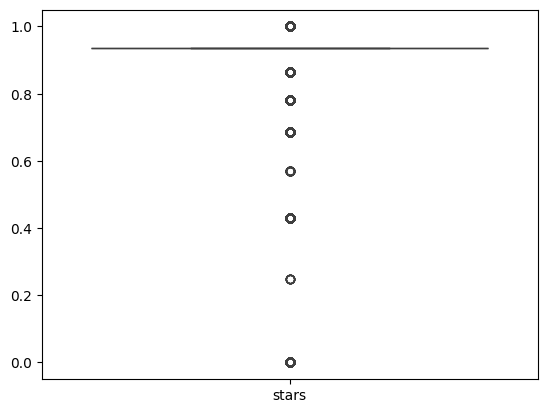

In [73]:
sns.boxplot(data=x_train[fix_cols])
plt.show()

In [76]:
x_train.isna().sum()/len(x_train)

,0
name,0.0
author,0.0
narrator,0.0
time,0.0
releasedate,0.0
language,0.0
stars,0.0


In [78]:
x_test.isna().sum() / len(x_test)

,0
name,0.0
author,0.0
narrator,0.0
time,0.0
releasedate,0.0
language,0.0
stars,0.0


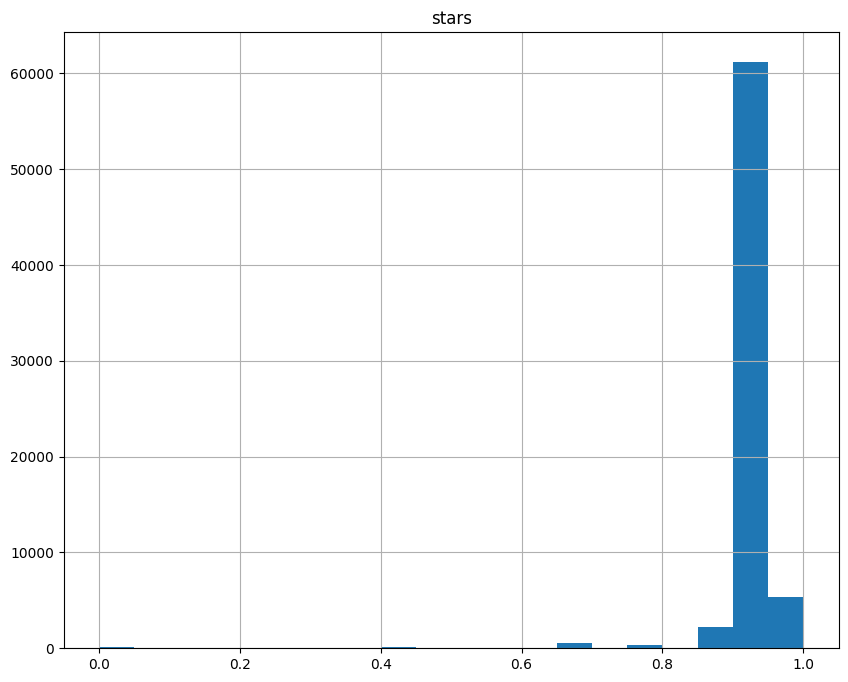

In [79]:
x_train[['stars']].hist(bins=20, figsize=(10, 8))
plt.show()

In [80]:
x_train['stars'].fillna(x_train['stars'].mean(), inplace=True)
x_test['stars'].fillna(x_test['stars'].mean(), inplace=True)

x_train.isna().sum() / len(x_train)

,0
name,0.0
author,0.0
narrator,0.0
time,0.0
releasedate,0.0
language,0.0
stars,0.0


In [82]:
categorical_cols = x_train.select_dtypes(include=['object']).columns

categorical_cols


Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language'], dtype='object')

In [83]:
print('-'*50)
for col in categorical_cols:
    print(x_train[col].value_counts())
    print('-'*50)


--------------------------------------------------
name
Sterling Biographies           17
Hamlet                         13
The Science of Getting Rich    13
Sterling Point Books           13
The Art of War                 12
                               ..
The Box-Car Children            1
Running Up That Hill            1
Prayers                         1
Die anderen und wir             1
第708回 新刊ラジオ第2部プレミアム　            1
Name: count, Length: 66728, dtype: int64
--------------------------------------------------
author
Writtenby:矢島雅弘,石橋遊                   670
Writtenby:SmartReading               312
Writtenby:中西貴之,BJ                    243
Writtenby:div.                       216
Writtenby:OnlineStudioProductions    170
                                    ... 
Writtenby:KaarloSarkia                 1
Writtenby:JohnA.Tracy,TageC.Tracy      1
Writtenby:CarmenLaforet                1
Writtenby:TerryHunt,CarlLipo           1
Writtenby:Dr.ThomasC.OdenPhD           1
Name: count, Length:

In [84]:
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

x_train.head()

,stars,"name_""... gegen die Verhexung des Verstandes""","name_""... und nie kann ich vergessen""","name_""All the Real Indians Died Off""","name_""Auringonsäteiden laulu""","name_""Aus gutem Holze""","name_""Das Böse ist des Menschen beste Kraft""","name_""Don't You Know Who I Am?"": How to Stay Sane in an Era of Narcissism, Entitlement, and Incivility","name_""Grund dafür sind Verzögerungen im Betriebsablauf""","name_""Homoaktion"" mod udlændingestyrelsen",...,language_portuguese,language_romanian,language_russian,language_slovene,language_spanish,language_swedish,language_tamil,language_telugu,language_turkish,language_urdu
77132,0.936684,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21282,1.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49569,0.936684,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8671,0.936684,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3524,0.936684,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
